###Importing modules and libraires:


In [26]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score



###Data loading and copy:

In [2]:
data=pd.read_csv('/content/Mall_Customers.csv')
df=data.copy()
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


###Data preprocessing and EDA:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Text(0.5, 1.0, 'Gender Distribution')

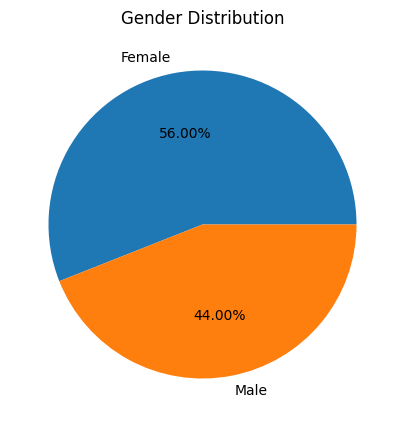

In [13]:
plt.figure(figsize=(5,5))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.2f%%')
plt.title('Gender Distribution')

In [140]:

age_bins = [18, 26, 36, 46, 56, df['Age'].max()]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56+']


df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


display(df['Age_Category'].value_counts())


display(df.head())

,count
Age_Category,
26-35,60
18-25,38
46-55,37
36-45,36
56+,27


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Category
0,1,Male,19,15,39,18-25
1,2,Male,21,15,81,18-25
2,3,Female,20,16,6,18-25
3,4,Female,23,16,77,18-25
4,5,Female,31,17,40,26-35


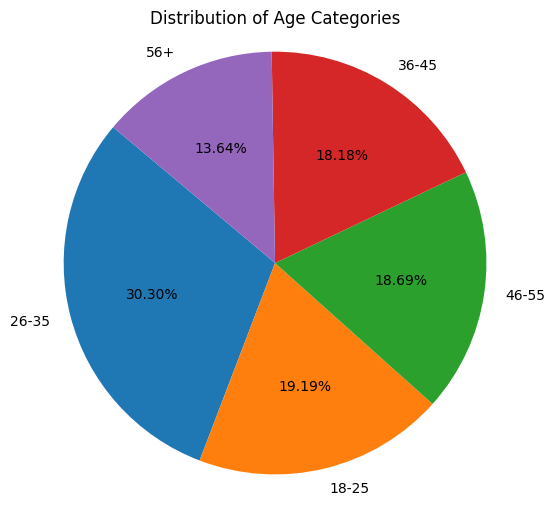

In [24]:
plt.figure(figsize=(6,6))
plt.pie(df['Age_Category'].value_counts(), labels=df['Age_Category'].value_counts().index, autopct='%1.2f%%', startangle=140)
plt.title('Distribution of Age Categories')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Age category Distribution')

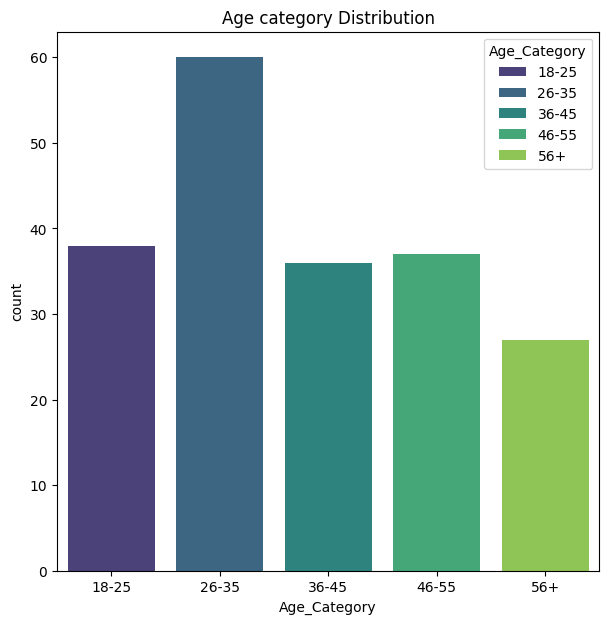

In [22]:
plt.figure(figsize=(7,7))
sns.countplot(x='Age_Category',data=df,palette='viridis',hue='Age_Category')
plt.title('Age category Distribution')

##Model selection and training:


In [42]:
kmodel=KMeans(n_clusters=5)
kmodel.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

Evaluation:

In [46]:
silhouette_avg = silhouette_score(df[['Annual Income (k$)','Spending Score (1-100)']],kmodel.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.553931997444648


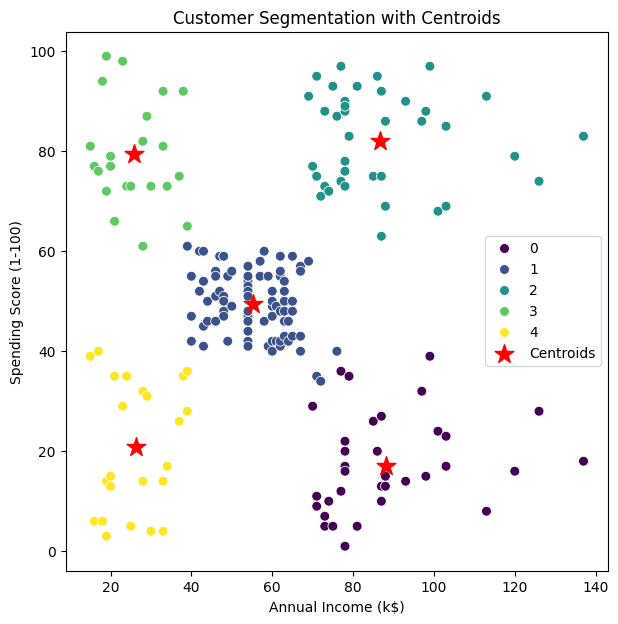

In [52]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=kmodel.labels_,
                data=df[['Annual Income (k$)','Spending Score (1-100)']],
                palette='viridis',
                s=50
                )


plt.scatter(kmodel.cluster_centers_[:, 0], kmodel.cluster_centers_[:, 1],
            s=200, c='red', marker='*', label='Centroids')


plt.title('Customer Segmentation with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() # Show legend with centroids label
plt.show()

###Trough DBSCAN:


In [53]:
from sklearn.cluster import DBSCAN

In [129]:
dbmodel=DBSCAN(eps=9.4,min_samples=3)
dbmodel.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

DBSCAN(eps=9.4, min_samples=3)

In [130]:
silhouette_avg = silhouette_score(df[['Annual Income (k$)','Spending Score (1-100)']],dbmodel.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.480431771178107


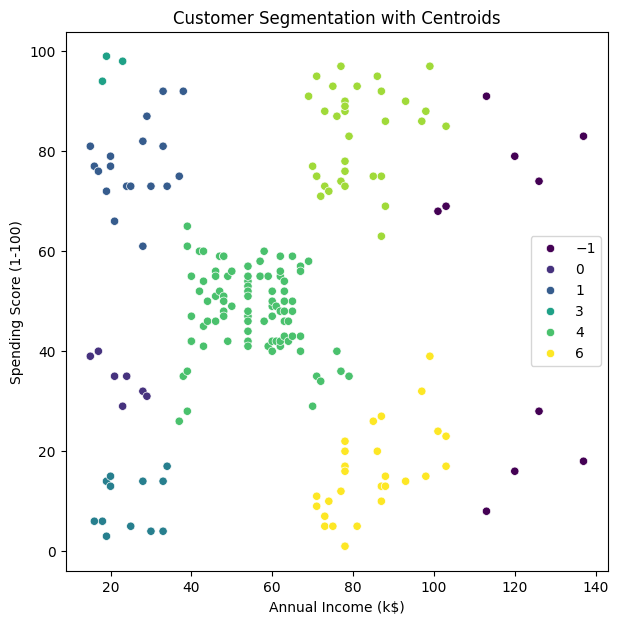

In [133]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=dbmodel.labels_,
                data=df[['Annual Income (k$)','Spending Score (1-100)']],
                palette='viridis',

                )


plt.title('Customer Segmentation with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()